### Лабораторная работа №2
### Школкин В.В М19-ТС 
### Вариант 5

In [94]:
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
ost_df=pd.read_csv('cneos_fireball_data.csv')
ost_df
#импортируем библиотеки и файл с данными

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


#### 1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии

In [6]:
maxm= ost_df[ost_df["Total Radiated Energy (J)"] == ost_df["Total Radiated Energy (J)"].max()]
maxm
#создаем фрейм из строки с максимальным значением энергии

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
146,2013-02-15 03:20:33,54.8N,61.1E,23.3,18.6,12.8,-13.3,-2.4,3.750000e+14,440.0


In [7]:
a = maxm['Latitude (deg.)']
b = maxm['Longitude (deg.)']
c= maxm['Altitude (km)']

print('Широта:', list(a)[0])
print('Долгота:', list(b)[0])
print('Высота:', list(c)[0])
#выводим значения широты, долготы и высоты 

Широта: 54.8N
Долгота: 61.1E
Высота: 23.3


#### 2. Определите метеорит с максимальной и минимальной скоростью.

In [14]:
ost_df[ost_df['Velocity (km/s)'] == max_velocity] 
#выводим строку с максимальной скоростью

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
67,2015-07-04 01:40:11,38.6N,103.1E,46.3,49.0,0.9,-40.4,-27.7,5.600000e+10,0.18


In [15]:
ost_df[ost_df['Velocity (km/s)'] == min_velocity]
#выводим строку с минимальной скоростью

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
300,2008-07-01 17:40:19,37.1N,115.7W,36.1,9.8,2.8,1.7,-9.2,3.600000e+10,0.12


#### 3. Определите место максимальной концентрации метеоритов.

In [19]:
ost_df.dropna(subset=['Latitude (deg.)', 'Longitude (deg.)'], inplace=True)
ost_df
#удаляем строки со значениями NaN

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [20]:
#Определяем полушария для каждой координаты (N или S, E или W)
latitude = list(ost_df['Latitude (deg.)'].apply(lambda x: x[-1]))
longitude = list(ost_df['Longitude (deg.)'].apply(lambda x: x[-1]))

#Всего можно выделить 4 области: N-E, N-W, S-E, S-W
#Создаем словарь для подсчета числа точек в каждой области
coordinates = {'N-E':0, 'N-W':0, 'S-E':0, 'S-W':0}

#Считаем точки
for x,y in zip(latitude, longitude):
    coordinates[x+'-'+y] +=1
print(coordinates)

{'N-E': 138, 'N-W': 126, 'S-E': 149, 'S-W': 126}


#### 4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график

In [21]:
ost_df=pd.read_csv('cneos_fireball_data.csv') #перечитываем файл

In [29]:
seasons_dict = {1:'winter', 2:'winter', 3:'spring', 4:'spring', 5:'spring', 6:'summer',
                7:'summer', 8:'summer', 9:'autumn', 10:'autumn', 11:'autumn', 12:'winter'}
#cоздаем словарь, где месяц соответствует времени года
seasons = ost_df['Peak Brightness Date/Time (UT)'].apply(lambda x: seasons_dict[datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month])
#Определяем время года, в которое появился каждый метеорит

In [34]:
ost_df.insert(0, 'Seasons', seasons)
#добавляем новый столбец

In [37]:
ost_df

,Seasons,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,summer,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,summer,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,summer,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,summer,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,summer,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...,...
714,autumn,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,autumn,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,autumn,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,autumn,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [38]:
print('Время года с наибольшим числом метеоритов:', ost_df['Seasons'].value_counts().index[0], '\n')
print(ost_df['Seasons'].value_counts())
#выводим колличество метеоритов по времени года

Время года с наибольшим числом метеоритов: autumn 

autumn    182
spring    180
winter    179
summer    178
Name: Seasons, dtype: int64


<AxesSubplot:xlabel='Время года', ylabel='Частота появления метеоритов'>

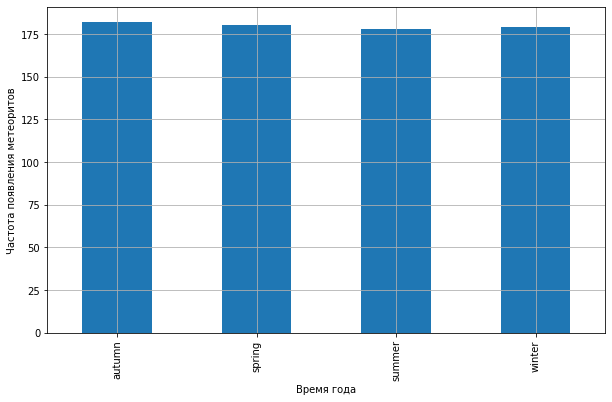

In [40]:
ost_df.groupby('Seasons').count()['Peak Brightness Date/Time (UT)'].plot(figsize=(10,6), kind='bar',
                                                                    xlabel='Время года', 
                                                                    ylabel='Частота появления метеоритов', 
                                                                    grid=True)

#### 5. Удалите строки данных, в которых для метеоритов не указана скорость. Выведите размер набора данных до и после удаления.

In [46]:
print('Размер набора данных до удаления:', ost_df.shape)
ost_df.drop(ost_df[(ost_df['Velocity (km/s)'].isnull())].index, inplace=True)
#удаляем строки с нулевыми значениями NaN
print('Размер набора данных после удаления:', ost_df.shape)

Размер набора данных до удаления: (719, 10)
Размер набора данных после удаления: (157, 10)


#### 6. Построить график, на котором по оси ОХ отложено время суток, по OY – частота появления метеоритов.

In [53]:
ost_df=pd.read_csv('cneos_fireball_data.csv') #перечитываем файл

In [54]:
time = ost_df['Peak Brightness Date/Time (UT)'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)
#Определяем время суток (будем считать, что время суток - это час появления метеорита) для каждой даты
ost_df.insert(0, 'Time', time)
#Добавляем новый столбец в таблицу с данными

<AxesSubplot:xlabel='Время суток', ylabel='Частота появления метеоритов'>

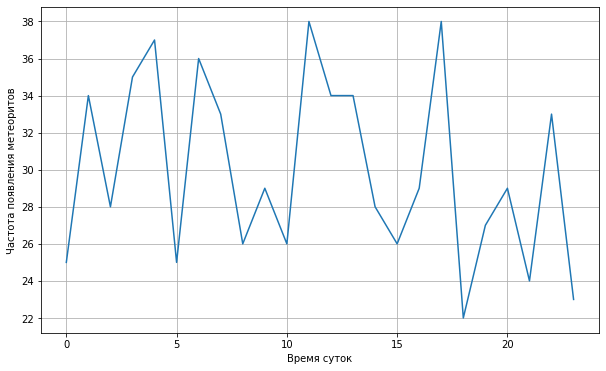

In [55]:
ost_df.groupby('Time').count()['Peak Brightness Date/Time (UT)'].plot(figsize=(10,6), xlabel='Время суток', ylabel='Частота появления метеоритов', grid=True)

#### 7. Заполните строки в которых для метеоритов не указана скорость.

In [56]:
ost_df=pd.read_csv('cneos_fireball_data.csv')
v = ost_df['Velocity (km/s)'].fillna(1)
v.reset_index()
#заполняем строки со значениями NaN единицами

,index,Velocity (km/s)
0,0,1.0
1,1,17.2
2,2,13.7
3,3,15.2
4,4,24.3
...,...,...
714,714,1.0
715,715,1.0
716,716,1.0
717,717,1.0


#### 8. Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).

In [77]:
def get_month(month):
    return month.split('-')[1].strip()

month = ost_df['Peak Brightness Date/Time (UT)'].apply(get_month)
month
#создаем столбец, состоящий из месяцев

0      07
1      07
2      07
3      06
4      06
       ..
714    11
715    10
716    10
717    10
718    04
Name: Peak Brightness Date/Time (UT), Length: 719, dtype: object

In [78]:
ost_df['Month'] = month
ost_df
#добавляем полученный столбец в фрейм данных

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Month
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190,07
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120,07
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230,07
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290,06
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520,06
...,...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092,11
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130,10
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400,10
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200,10


In [83]:
month = ost_df.groupby('Month')['Peak Brightness Date/Time (UT)'].count()
#группируем столбцы месяц и дата/время и считаем колличество повторений
month = pd.DataFrame(month)
month.reset_index()
#создаем новый фрейм и присваеваем индесы

,Month,Peak Brightness Date/Time (UT)
0,01,60
1,02,61
2,03,61
3,04,63
4,05,56
5,06,59
6,07,60
7,08,59
8,09,52
9,10,65


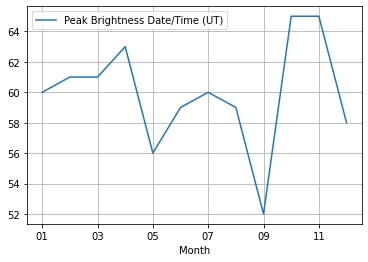

In [88]:
month.plot(stacked='True', grid=True)
plt.show()

#### 9. Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и Total Radiated Energy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value

In [89]:
ost_df.dropna(subset=['Altitude (km)'], inplace=True)
#удаляем нулевые значения

In [92]:
col =ost_df[['Altitude (km)', 'Total Radiated Energy (J)']]
col
#создаем фрейм из двух столбцов

,Altitude (km),Total Radiated Energy (J)
1,38.0,3.500000e+10
2,35.0,7.300000e+10
3,20.0,9.400000e+10
4,35.1,1.840000e+11
5,33.3,6.360000e+11
...,...,...
600,69.0,1.240000e+11
610,32.0,5.060000e+12
613,65.0,3.500000e+10
626,30.0,7.400000e+10


In [93]:
coef_corr_pearson, p_value_pearson = stats.pearsonr(col['Altitude (km)'], col['Total Radiated Energy (J)']) 
coef_corr_spearman, p_value_spearman = stats.spearmanr(col['Altitude (km)'], col['Total Radiated Energy (J)'])
#считаем корреляци Пирсона и Спирмена
print(f'Коэффициент корреляции Пирсона: {coef_corr_pearson}, p-value: {p_value_pearson}')
print(f'Коэффициент корреляции Спирмена: {coef_corr_spearman}, p-value: {p_value_spearman}')

Коэффициент корреляции Пирсона: -0.08578656525823586, p-value: 0.13368269878711372
Коэффициент корреляции Спирмена: -0.12671041939219074, p-value: 0.026415728610676672


C:\Users\p1\Desktop\WPy64-3870\python-3.8.7.amd64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Altitude (km)', ylabel='Density'>

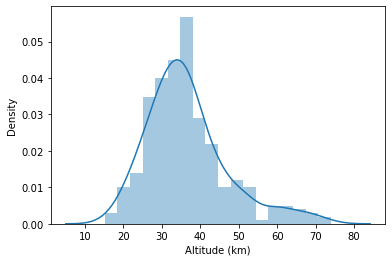

In [96]:
sns.distplot(col['Altitude (km)'])

C:\Users\p1\Desktop\WPy64-3870\python-3.8.7.amd64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Radiated Energy (J)', ylabel='Density'>

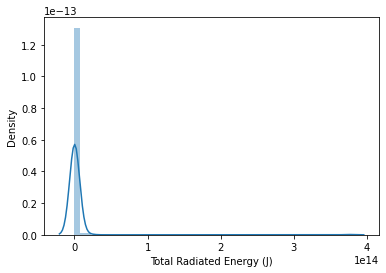

In [97]:
sns.distplot(col['Total Radiated Energy (J)'])